In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
doubles = glob.glob("results/data_gpu/double*.dat")
floats = glob.glob("results/data_gpu/float*.dat")

In [3]:
def params_from_fn(fn):
    m = re.match('(.+?)_p(.+?)_n(.+?).dat', fn.split('\\')[-1])
    p = m.group(2)
    n = m.group(3)
    return p, n

In [4]:
doubles_p = [params_from_fn(_) for _ in doubles]
floats_p = [params_from_fn(_) for _ in floats]

In [5]:
doubles_d = [np.loadtxt(_, delimiter=', ') for _ in doubles]
floats_d = [np.loadtxt(_, delimiter=', ') for _ in floats]

In [6]:
doubles_t = np.array([np.mean(_, axis=0) for _ in doubles_d])
floats_t = np.array([np.mean(_, axis=0) for _ in floats_d])

In [7]:
doubles_dt = np.array([np.std(_, axis=0) for _ in doubles_d])
floats_dt = np.array([np.std(_, axis=0) for _ in floats_d])

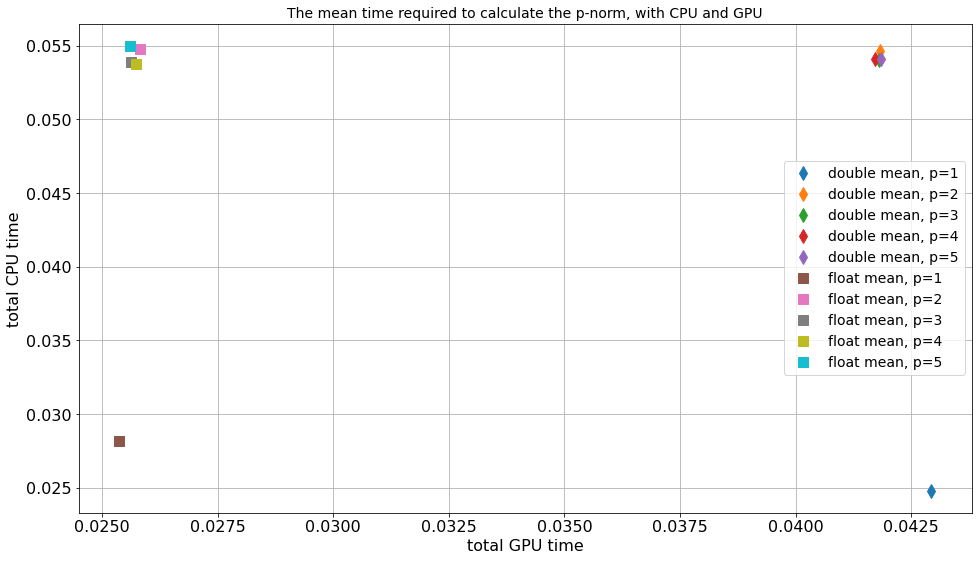

In [8]:
plt.figure(figsize=(16, 9))

plt.title('The mean time required to calculate the p-norm, with CPU and GPU', fontsize=14)


cput = np.concatenate((floats_t[:, 0], doubles_t[:, 0]))
gput = np.concatenate((floats_t[:, 1], doubles_t[:, 1]))

for i in range(len(doubles_p)):
    p = doubles_p[i][0]
    plt.plot(doubles_t[i, 2], doubles_t[i, 1], 'd', label=f'double mean, p={p}', markersize=10)
for i in range(len(floats_p)):
    p = floats_p[i][0]
    plt.plot(floats_t[i, 2], floats_t[i, 1], 's', label=f'float mean, p={p}', markersize=10)
plt.legend()
plt.legend(fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.ylabel('total CPU time', fontsize=16)
plt.xlabel('total GPU time', fontsize=16)

plt.savefig('results/cpu_vs_gpu_total_mean.png')

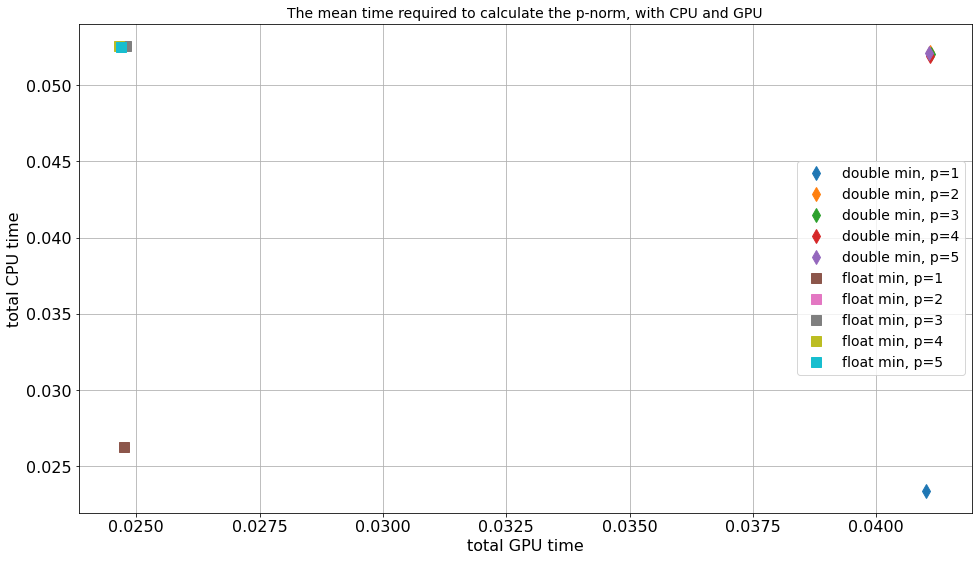

In [9]:
plt.figure(figsize=(16, 9))

plt.title('The mean time required to calculate the p-norm, with CPU and GPU', fontsize=14)


cput = np.concatenate((floats_t[:, 0], doubles_t[:, 0]))
gput = np.concatenate((floats_t[:, 1], doubles_t[:, 1]))

for i in range(len(doubles_p)):
    p = doubles_p[i][0]
    plt.plot(np.min(doubles_d[i], axis=0)[2], np.min(doubles_d[i], axis=0)[1], 'd', label=f'double min, p={p}', markersize=10)
for i in range(len(floats_p)):
    p = floats_p[i][0]
    plt.plot(np.min(floats_d[i], axis=0)[2], np.min(floats_d[i], axis=0)[1], 's', label=f'float min, p={p}', markersize=10)
plt.legend()
plt.legend(fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.ylabel('total CPU time', fontsize=16)
plt.xlabel('total GPU time', fontsize=16)

plt.savefig('results/cpu_vs_gpu_total_min.png')

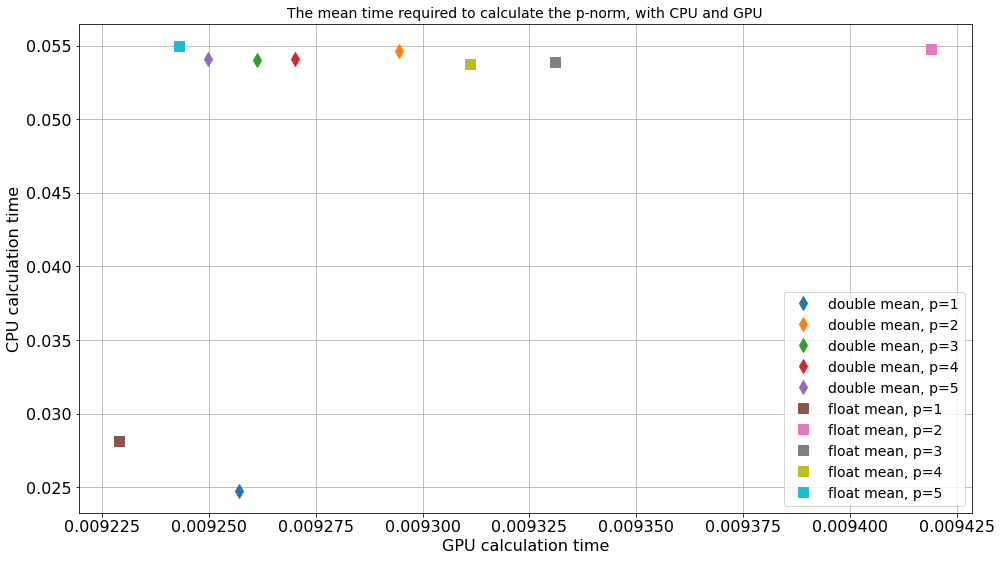

In [10]:
plt.figure(figsize=(16, 9))

plt.title('The mean time required to calculate the p-norm, with CPU and GPU', fontsize=14)


cput = np.concatenate((floats_t[:, 0], doubles_t[:, 0]))
gput = np.concatenate((floats_t[:, 1], doubles_t[:, 1]))

for i in range(len(doubles_p)):
    p = doubles_p[i][0]
    plt.plot(doubles_t[i, 3], doubles_t[i, 0], 'd', label=f'double mean, p={p}', markersize=10)
for i in range(len(floats_p)):
    p = floats_p[i][0]
    plt.plot(floats_t[i, 3], floats_t[i, 0], 's', label=f'float mean, p={p}', markersize=10)
plt.legend()
plt.legend(fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.ylabel('CPU calculation time', fontsize=16)
plt.xlabel('GPU calculation time', fontsize=16)

plt.savefig('results/cpu_vs_gpu_calconly_mean.png')

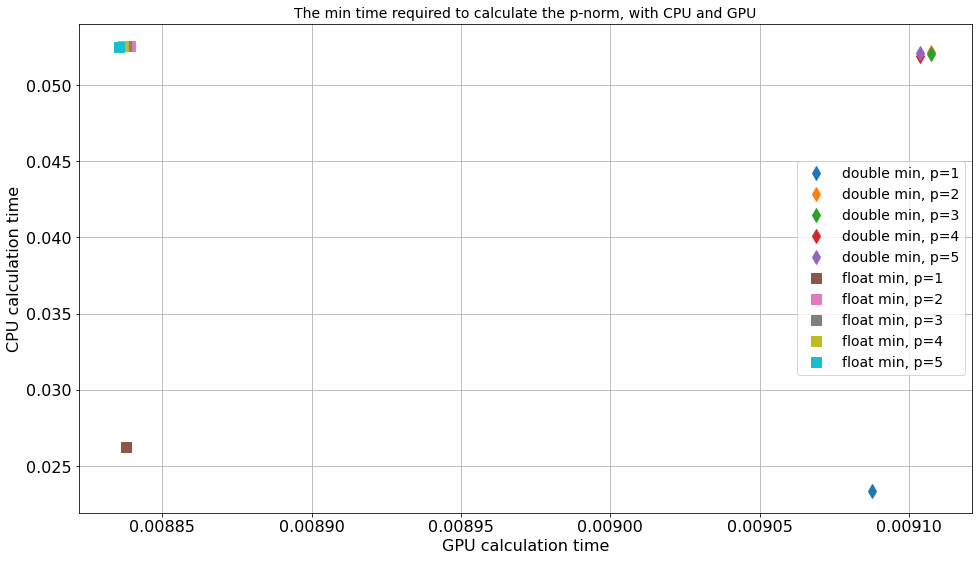

In [11]:
plt.figure(figsize=(16, 9))

plt.title('The min time required to calculate the p-norm, with CPU and GPU', fontsize=14)


cput = np.concatenate((floats_t[:, 0], doubles_t[:, 0]))
gput = np.concatenate((floats_t[:, 1], doubles_t[:, 1]))

for i in range(len(doubles_p)):
    p = doubles_p[i][0]
    plt.plot(np.min(doubles_d[i], axis=0)[3], np.min(doubles_d[i], axis=0)[0], 'd', label=f'double min, p={p}', markersize=10)
for i in range(len(floats_p)):
    p = floats_p[i][0]
    plt.plot(np.min(floats_d[i], axis=0)[3], np.min(floats_d[i], axis=0)[0], 's', label=f'float min, p={p}', markersize=10)
plt.legend()
plt.legend(fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.ylabel('CPU calculation time', fontsize=16)
plt.xlabel('GPU calculation time', fontsize=16)

plt.savefig('results/cpu_vs_gpu_calconly_min.png')